## Question3

## Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing the combined dataset
datacomb=pd.read_csv("../Coursework/datacomb.csv")

In [3]:
#Removing the unnamed column in datacomb
datacomb=datacomb.iloc[:,1:]

In [4]:
datacomb.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,NaN,0,0,0,0,0,0
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,27,19,0,NaN,0,0,0,0,0,0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,NaN,0,0,0,0,0,0
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,16,10,0,NaN,0,0,0,0,0,0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,NaN,0,0,0,0,0,0


In [5]:
pd.isnull(datacomb).sum(axis=0)
#no missing values in Year,Month,Origin,Dest hence missing values aren't removed from the dataset

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                282682
CRSDepTime                  0
ArrTime                316046
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                    22
ActualElapsedTime      316046
CRSElapsedTime            998
AirTime                316046
ArrDelay               316046
DepDelay               282682
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14312420
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

Number of flights is taken as a proxy to the number of people

In [6]:
#Importing the 'airports' csv file
airports=pd.read_csv("../Coursework/airports_c.csv")

In [7]:
#Viewing "airports" dataframe
airports

,Unnamed: 0,iata,airport,city,state,country,lat,long
0,0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...,...
3359,3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3360,3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3361,3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3362,3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [8]:
#Making a dataset on the Origin of the flight using iata and state
Origin_data=airports.iloc[: , np.array([1,4])]

In [9]:
#renaming the columns of Origin_data
Origin_data=Origin_data.rename(columns={'iata':'Origin','state':'Origin_state'})

In [10]:
#Making a dataset on the destination of the flight using iata and state
Dest_data=airports.iloc[:, np.array([1,4])]

In [13]:
#Renaming the columns of Dest_data
Dest_data=Dest_data.rename(columns={'iata':'Dest','state':'Dest_state'})

In [12]:
#Seperating columns that are needed from "datacomb" into "data"
data=datacomb.iloc[:, np.array([0,1,9,16,17])]

In [14]:
#Merging Origin_data with data on "Origin"
dataset = data.merge(Origin_data,on=['Origin'])

In [15]:
#Merging Dest_data with dataset on "Dest"
finaldataset=dataset.merge(Dest_data,on=['Dest'])

In [16]:
#Seperating the 2006 year rows from "finaldataset"
data_2006 = finaldataset[finaldataset.Year == 2006]

In [17]:
#Seperating the 2007 year rows from "finaldataset"
data_2007 = finaldataset[finaldataset.Year == 2007]

In [18]:
#Grouping "data_2006" by 'Month' with the count of 'FlightNum' to show how many flights there were per month in 2006
data1=data_2006.groupby(['Month'])['FlightNum'].count().reset_index()

In [19]:
#Viewing "data1"
data1

,Month,FlightNum
0,1,580543
1,2,530570
2,3,604458
3,4,584529
4,5,602060
5,6,597484
6,7,620418
7,8,627874
8,9,584116
9,10,610855


In [20]:
#Grouping "data_2007" by 'Month' with the count of 'FlightNum' to show how many flights there were per month in 2007
data2=data_2007.groupby(['Month'])['FlightNum'].count().reset_index()

In [21]:
#Viewing "data2"
data2

,Month,FlightNum
0,1,620794
1,2,564939
2,3,638376
3,4,613748
4,5,630727
5,6,628291
6,7,647486
7,8,652203
8,9,599268
9,10,629027


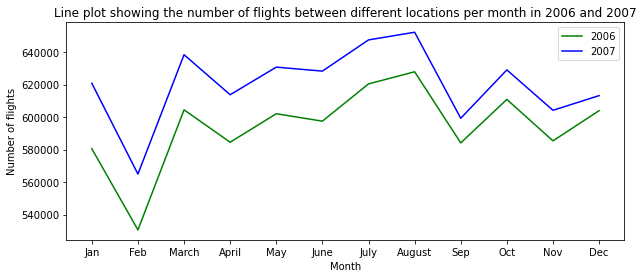

In [22]:
#Plotting a line graph to visualise the trend over months in the number of flights in 2006 and 2007
fig, ax=plt.subplots(figsize=(10,4))
ax.plot(data1['Month'],data1['FlightNum'],color='green',label='2006')
ax.plot(data2['Month'],data2['FlightNum'],color='blue',label='2007')
ax.set_ylabel('Number of flights')
plt.xticks(data1['Month'],['Jan','Feb','March','April','May','June','July','August','Sep','Oct','Nov','Dec'])
ax.set_xlabel('Month')
ax.title.set_text('Line plot showing the number of flights between different locations per month in 2006 and 2007')
ax.legend()
plt.show()

Number of flights between different locations has risen overtime.

## Finding the routes that had the highest number of people travelling in 2006 and 2007

In [79]:
#Grouping 'data_2006' by Dest_state and Origin_state
x= data_2006.groupby(by= ['Dest_state','Origin_state']).size().reset_index()

In [80]:
#Viewing "x"
x

,Dest_state,Origin_state,0
0,AK,AK,26710
1,AK,AZ,364
2,AK,CA,494
3,AK,CO,622
4,AK,GA,109
...,...,...,...
1288,WY,OR,2
1289,WY,SD,1
1290,WY,TX,212
1291,WY,UT,3802


In [82]:
#Renaming the column in 'x' correctly
x.rename({0:'Number of people'}, inplace = True, axis = 1)

In [83]:
#Checking whether the column names have been named correctly in "x"
x

,Dest_state,Origin_state,Number of people
0,AK,AK,26710
1,AK,AZ,364
2,AK,CA,494
3,AK,CO,622
4,AK,GA,109
...,...,...,...
1288,WY,OR,2
1289,WY,SD,1
1290,WY,TX,212
1291,WY,UT,3802


In [84]:
#Sorting "x" by the descending order to find the routes with highest number of people travelling in 2006 (number of flights is used as a substitute)
x.sort_values(by=['Number of people'],ascending=False)

,Dest_state,Origin_state,Number of people
94,CA,CA,356304
1126,TX,TX,273782
281,HI,HI,85423
54,AZ,CA,71766
93,CA,AZ,71690
...,...,...,...
575,MI,OK,1
31,AR,AR,1
1208,VA,WV,1
680,MT,OR,1


In [85]:
#Grouping "data_2007" by Dest_state and Origin_state
y= data_2007.groupby(by= ['Dest_state','Origin_state']).size().reset_index()

In [86]:
y

,Dest_state,Origin_state,0
0,AK,AK,26668
1,AK,AZ,364
2,AK,CA,516
3,AK,CO,536
4,AK,GA,109
...,...,...,...
1354,WY,MT,1
1355,WY,SD,1
1356,WY,TX,227
1357,WY,UT,3731


In [87]:
#Renaming columns in 'y' appropriately
y.rename({0:'Number of people'}, inplace = True, axis = 1)

In [88]:
#Viewing "y"
y

,Dest_state,Origin_state,Number of people
0,AK,AK,26668
1,AK,AZ,364
2,AK,CA,516
3,AK,CO,536
4,AK,GA,109
...,...,...,...
1354,WY,MT,1
1355,WY,SD,1
1356,WY,TX,227
1357,WY,UT,3731


In [89]:
#Sorting "y" in the descending order to find the routes with highest number of people travelling in 2007 (number of flights is used as a substitute)
y.sort_values(by=['Number of people'],ascending=False)

,Dest_state,Origin_state,Number of people
98,CA,CA,369942
1178,TX,TX,254877
295,HI,HI,104817
97,CA,AZ,72653
59,AZ,CA,72051
...,...,...,...
481,LA,LA,1
1326,WI,MT,1
413,IN,SD,1
412,IN,SC,1
